In [19]:
import numpy as np
import matplotlib.pyplot as plt
from bnk import *

# Structure

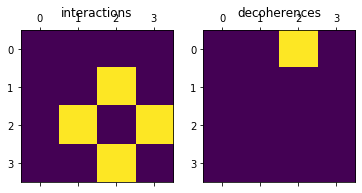

In [20]:
space = Space(4)

interactions_conf = {
    (1,2): 0.2,
    (2,3): 0.2
}

decoherences_conf = {
    (2,0): 0.2
}

interactions = zero
for (i1,i2), intensity in interactions_conf.items():
    interaction = space.eigenstate(i2)@space.eigenstate(i1).ct
    interaction += interaction.ct
    interaction *= intensity
    interactions += interaction

decoherences = zero
for (i1,i2), intensity in decoherences_conf.items():
    decoherence = space.eigenstate(i2)@space.eigenstate(i1).ct
    decoherence *= np.sqrt(intensity)
    decoherences += decoherence


plt.subplot(1, 2, 1)
plt.matshow(interactions.flattened_values, 0)
plt.title("interactions")

plt.subplot(1, 2, 2)
plt.matshow(decoherences.flattened_values, 0)
plt.title("decoherences")

plt.show()

# Evolution

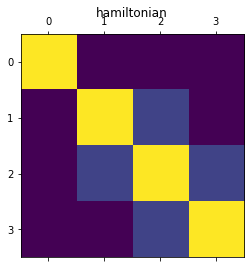

In [21]:
energy = space.identity()

def hamiltonian(hb, w):
    return hb * w * energy + interactions


plt.matshow(hamiltonian(1, 1).flattened_values)
plt.title("hamiltonian")
plt.show()

In [22]:
def evolve(rho, hb, w):
    hmt = hamiltonian(hb,w)
    deco = decoherences
    deco_ct = deco.ct
    deco_ct_deco = deco_ct @ deco
    return hmt @ rho - rho @ hmt + 1j * (deco @ rho @ deco_ct - 0.5 * (deco_ct_deco@ rho + rho @ deco_ct_deco))

# Iteration

## Initial $\rho$

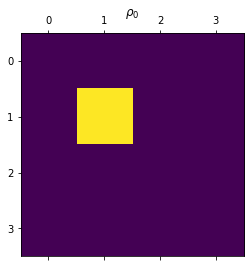

In [23]:
initial_state = space.eigenstate(1)

initial_rho = initial_state @ initial_state.ct


plt.matshow(initial_rho.flattened_values)
plt.title("$\\rho_0$")
plt.show()

## Constant

In [24]:
hb = 1
w = 1

## Configurations

In [25]:
dt = 0.005
mt = 70

logs_dt = mt / 200

## Iterations

In [26]:
%%time

t = 0.0
rho = initial_rho

logs_t = float('-inf')
logs = []

while t < mt:
    t += dt
    rho += evolve(rho,hb,w) * (dt / (1j * hb))
    
    if t - logs_t > logs_dt:
        
        rho /= rho.trace().values
        
        logs_t = t
        prob_all = np.diag(rho.flattened_values)
        
        logs.append((t, *prob_all))
        
        print(f"\rcomputing...{t/mt:.2%}", end='')
        
print("\nfinished")

computing...99.59%
finished
Wall time: 27.6 s


C:\Users\keli\Anaconda3\envs\sci\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\keli\Anaconda3\envs\sci\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\keli\Anaconda3\envs\sci\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\keli\Anaconda3\envs\sci\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


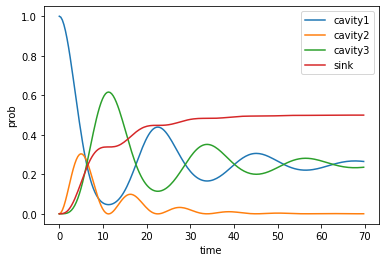

In [27]:
logs_t, logs_sink, logs_cavity1, logs_cavity2, logs_cavity3 = np.transpose(logs)
plt.plot(logs_t, logs_cavity1, label='cavity1')
plt.plot(logs_t, logs_cavity2, label='cavity2')
plt.plot(logs_t, logs_cavity3, label='cavity3')
plt.plot(logs_t, logs_sink, label='sink')
plt.legend()
plt.xlabel("time")
plt.ylabel("prob")
plt.show()